### **NECESSARY IMPORTS**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import files
from keras.preprocessing import image
import os
import PIL
from PIL import Image
%matplotlib inline

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout 
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator, load_img, img_to_array

### **CONNECT DRIVE WITH GOOGLE COLAB**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **DEFINE BASE DIRECTORY FOR DATASET**

In [ ]:
BASE = "/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S"
path_to_directory = os.path.join(BASE, 'dataset')

In [ ]:
#!unzip "/content/drive/MyDrive/Colab Notebooks/Fruits Classification/archive.zip" -d "/content/drive/MyDrive/Colab Notebooks/Fruits Classification/"

### **PLOT OF SOME TRAINING IMAGES**

In [ ]:
fapple = os.path.join(BASE,"dataset","train","freshapples")

In [ ]:
freshapples = os.listdir(fapple)
print(freshapples)

['rotated_by_45_Screen Shot 2018-06-08 at 5.13.18 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.21.31 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.15.28 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.13.10 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.15.39 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.03.59 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.10.43 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.04.24 PM.png', 'rotated_by_30_Screen Shot 2018-06-08 at 5.26.52 PM.png', 'rotated_by_30_Screen Shot 2018-06-08 at 5.28.48 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.23.23 PM.png', 'rotated_by_60_Screen Shot 2018-06-08 at 5.15.39 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.26.24 PM.png', 'rotated_by_60_Screen Shot 2018-06-08 at 5.17.34 PM.png', 'rotated_by_45_Screen Shot 2018-06-08 at 5.34.07 PM.png', 'rotated_by_60_Screen Shot 2018-06-08 at 5.17.04 PM.png', 'rotated_by_60_Screen Shot 2018-06-08 at 5.13.25 PM.png', 'rotated_by_6

PNG
(342, 322)
RGB


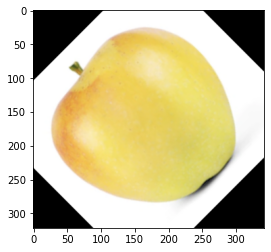

PNG
(346, 334)
RGB


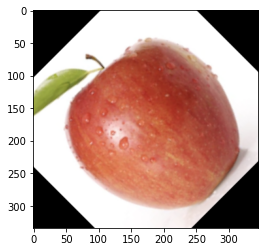

PNG
(384, 438)
RGB


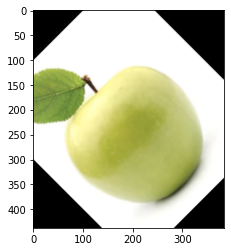

PNG
(334, 324)
RGB


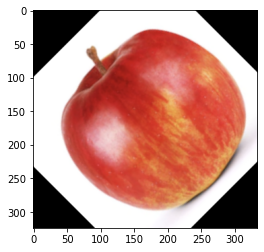

PNG
(378, 350)
RGB


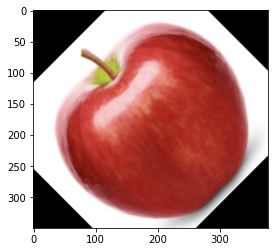

In [ ]:
for i in range(0,5):
  im = os.path.join(fapple,freshapples[i])
  image = Image.open(im)
  # summarize some details about the image
  print(image.format)
  print(image.size)
  print(image.mode)
  # show the image

  # display the array of pixels as an image
  plt.imshow(image)
  plt.show()

### **IMAGE TRAINING DATA AND VALIDATION DATA PREPROCESSING**

In [ ]:
TRAINING_DIR = os.path.join(BASE, "dataset", "train")
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = os.path.join(BASE, "dataset", "test")
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=64
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
class_labels = train_generator.class_indices
train_labels = train_generator.classes
validation_labels = validation_generator.classes

print(class_labels)
print(len(train_labels))
print(train_labels[0:5])
print(len(validation_labels))
print(validation_labels[0:5])

{'freshapples': 0, 'freshbanana': 1, 'freshoranges': 2, 'rottenapples': 3, 'rottenbanana': 4, 'rottenoranges': 5}
10901
[0 0 0 0 0]
2698
[0 0 0 0 0]


## **BASELINE MODEL**

### **CONVOLUTIONAL NEURAL NETWORK DECLARATION**

In [ ]:
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
# The second convolution
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# The third convolution
model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# The fourth convolution
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# Flatten the results to feed into a DNN
model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))


model.add(Dense(512, activation='relu'))
model.add(Dense(64, activation="relu"))
model.add(Dense(6, activation='softmax'))

### **CALLBACKS DECLARATION TO SAVE THE BEST WEIGHTS**

### **LEARNING RATE SCHEDULAR DECLARATION TO FIND THE BEST LEARNING RATE FOR MODEL**

In [ ]:
LR_MAX = 0.0001
LR_MIN = 0.00001
LR_EXP_DECAY = 0.85

def lrfn(epoch):
    lr = (LR_MAX - LR_MIN) * LR_EXP_DECAY**(epoch) + LR_MIN
    return lr

    
lr_callback = tf.keras.callbacks.LearningRateScheduler(lrfn, verbose = True)

In [ ]:
checkpoint_filepath = os.path.join(BASE, "model_checkpoint")
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                               save_weights_only=True,
                                                               monitor='val_accuracy',
                                                               mode='max',
                                                               save_best_only=True)

### **SUMMARY OF THE MODEL**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

In [ ]:
# !pip install pydot
# !pip install pydotplus
!pip install graphviz
from tensorflow.keras.utils import Sequence, to_categorical, plot_model
plot_model(model, show_shapes=True)

AssertionError: ignored

### **IMPLEMENTATION OF THE MODEL**

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#history = model.fit(train_generator, epochs=7, validation_data = validation_generator, verbose = 1, validation_steps = 3, callbacks = [model_checkpoint_callback, lr_callback])

### **PLOT OF VALIDATION ACCURACY AND TRAINING ACCURACY, & VALIDATION LOSS AND TRAINING LOSS**

### **SAVE THE BEST MODEL & WEIGHTS**

In [ ]:
model.save(os.path.join(BASE,"baseline_model.h5"))
model.save_weights(os.path.join(BASE,"model_weights.h5"))

### **LOAD MODEL** 

In [ ]:
# model = keras.models.load_model("/content/drive/MyDrive/Project/baseline_model.h5")
checkpoint_filepath = os.path.join(BASE, "model_checkpoint")
model.load_weights(checkpoint_filepath)
# model.load_weights("/content/drive/MyDrive/Project/model_weights.h5")

### **PREDICTION ON RANDOM SET OF IMAGES**

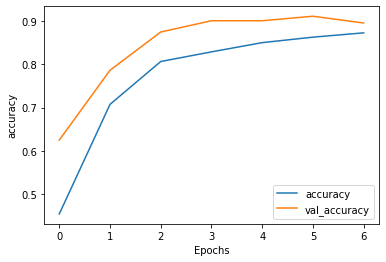

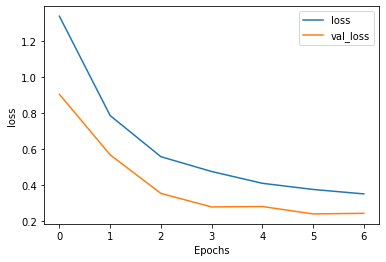

In [ ]:
def plot_graphs(history, string, figname):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.savefig(os.path.join(BASE, figname))
  plt.show()
  

plot_graphs(history, 'accuracy', 'accuracy.png')
plot_graphs(history, 'loss', 'loss.png')

### **PLOT PREDICTED IMAGES**

In [ ]:
test_dir = os.path.join(BASE, 'sample_test')
test_data = [os.path.join(test_dir, x) for x in os.listdir(test_dir)]
print(test_data)

['/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/banana4.jpg', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/banana3.jpg', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/banana1.jpg', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/orange3.png', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/orange4.jpg', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/orange5.jpg', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/banana2.jpeg', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/apple5.jpg', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/orange2.jpg', '/content/drive/MyDrive/Colab Notebooks/Fruits Classification/Baseline S/sample_test/banana5.jpg', '/content

In [ ]:
cls_lbls = {v: k for k, v in class_labels.items()}

In [ ]:
preds = []
for path in test_data:
  img = keras.preprocessing.image.load_img(path, target_size=(150,150,3))
  x = keras.preprocessing.image.img_to_array(img, dtype='float32')
  x = x/255.0
  # plt.imshow(x)
  # plt.show()
  x = np.expand_dims(x, axis=0)
  pred = model.predict(x)
  print(cls_lbls[np.argmax(pred)])
  preds.append(cls_lbls[np.argmax(pred)])

rottenbanana
rottenbanana
freshbanana
freshoranges
freshoranges
rottenoranges
freshapples
freshapples
rottenoranges
rottenbanana
freshapples
rottenapples
rottenoranges
rottenapples
rottenoranges


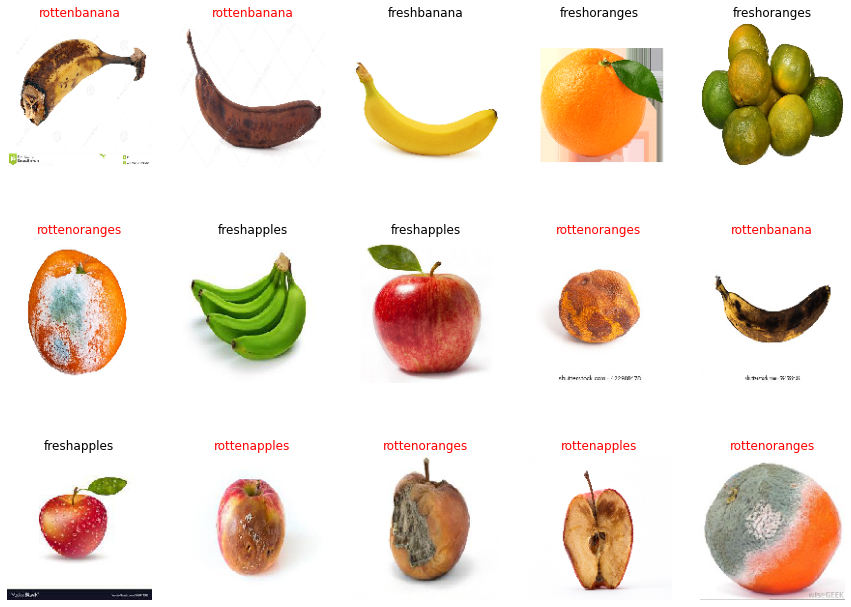

In [ ]:
plt.figure(figsize=(15, 15))
for n in range(len(test_data)):
  plt.subplot((len(test_data)/5)+1, 5, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(test_data[n], color_mode="rgb", target_size=(150, 150), interpolation="nearest"))
  title = preds[n]
  if title[0] == 'f':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()